# **Euler's Method for Solving Ordinary Differential Equations (ODEs)**

## **What is Euler’s Method?**
Euler’s method is a **numerical approach** for solving **ordinary differential equations (ODEs)**. Here one example:

$$
\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0
$$

where:
- $y$ is the unknown function.
- $f(x, y)$ is the **derivative** (rate of change) of $y$ with respect to $x$.
- $(x_0, y_0)$ is the **initial condition**.








Euler's method approximates the solution by iterating over small steps of size \( h \) using the update formula:

$$
y_{n+1} = y_n + h f(x_n, y_n)
$$

where:
- $ y_n $ is the approximation of $ y(x_n) $,
- $ x_{n+1} = x_n + h $,
- $ h $ is the step size.
- initial condition y(0) must be specified 

## Step-by-Step Implementation
1. **Initialize**: Start with the given initial condition $ (x_0, y_0) $.
2. **Iterate**: Compute successive values using the Euler update formula.
3. **Stop** when the desired interval $ [x_0, x_{ext{end}}] $ is reached.





# **Euler's Method and Step Size Convergence Analysis**

## **Example Convergence with h**
This script demonstrates how **Euler's method** behaves for solving the ordinary differential equation (ODE):

$$
\frac{dy(x)}{dx} = -2y(x)
$$

with the initial condition:

$$
y(0) = 1
$$

The analytical solution for this equation is given by:

$$
y(x) = e^{-2x}
$$

Euler’s method approximates the solution numerically, and the accuracy of the approximation depends on the choice of **step size** $ h $.
In this example the the derivative has been defined as a function of one variable y(x) and f(y) is dy/dx


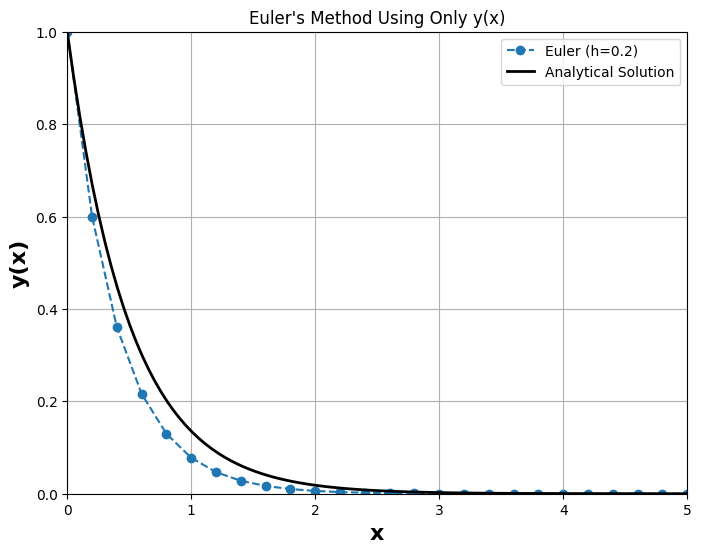

In [9]:
import numpy as np
import matplotlib.pyplot as plt

############################################################################
# Define the ODE dy/dx = f(y)
def f(y):
    return -2 * y  # Exponential decay
############################################################################


####################################################################################################
############################ Euler's Method Implementation #########################################

# Euler's Method  y(x)
def euler_method(f, y0, x_end, h):
    x_values = np.arange(0, x_end + h, h)  # Generate x values
    y_values = np.zeros(len(x_values))  # Store computed values
    y_values[0] = y0  # Initial condition

    # Apply Euler's method
    for i in range(1, len(x_values)):
        y_values[i] = y_values[i-1] + h * f(y_values[i-1])  # Only 'y' is updated

    return x_values, y_values
####################################################################################################
####################################################################################################



# Parameters
y0 = 1       # Initial condition y(0) = 1
x_end = 5    # Final x value
h_values = [0.5, 0.2, 0.1, 0.05, 0.025]  # Step sizes
h=0.2      # Step size
x_values, y_euler = euler_method(f, y0, x_end, h)


plt.figure(figsize=(8, 6))

plt.plot(x_values, y_euler, marker='o', linestyle='--', label=f"Euler (h={h})")

# Compute and plot Euler's method for different step sizes
# for h in h_values:
#     x_values, y_euler = euler_method(f, y0, x_end, h)
#     y_exact = y0 * np.exp(-2 * x_values)  # Analytical solution

#     plt.plot(x_values, y_euler, marker='o', linestyle='--', label=f"Euler (h={h})")



# Plot analytical solution
x_fine = np.linspace(0, x_end, 100)
y_fine = y0 * np.exp(-2 * x_fine)
plt.plot(x_fine, y_fine, label="Analytical Solution", linestyle='-', linewidth=2, color='black')

# Labels and legend
plt.xlabel('x', fontsize=16, fontweight='bold')
plt.ylabel('y(x)', fontsize=16, fontweight='bold')
plt.title("Euler's Method Using Only y(x)")
plt.xlim(0, x_end)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()



## **Analysis of the local and global error with h**

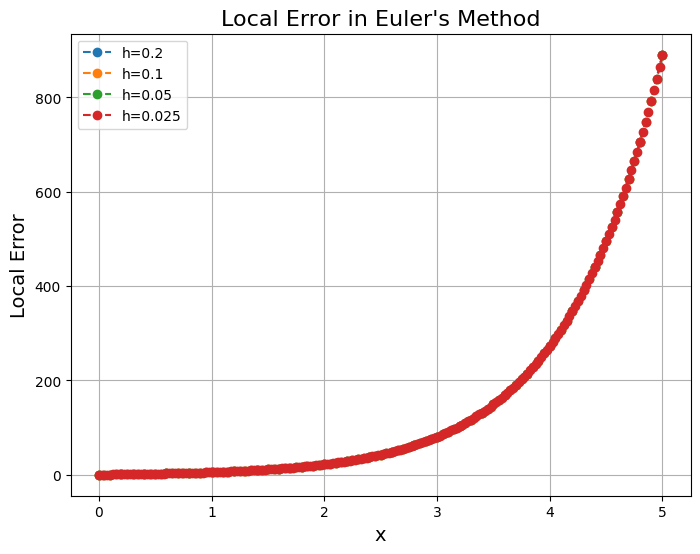

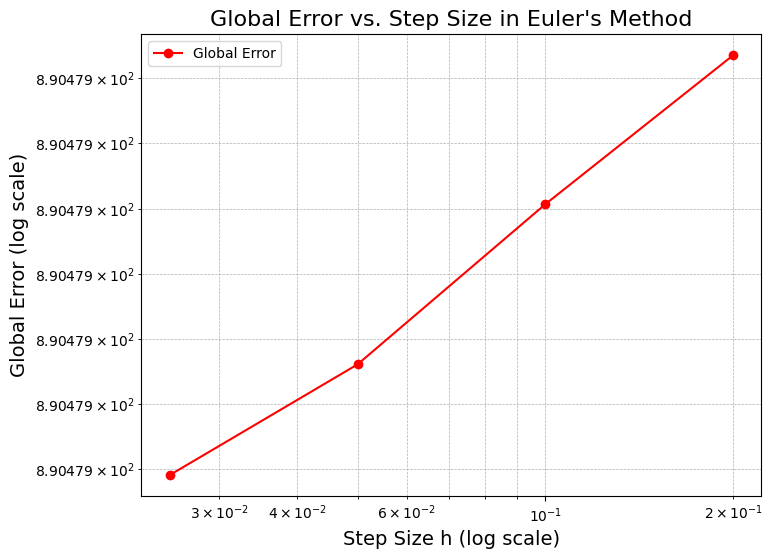

In [10]:


global_errors = []

# Plot local errors
plt.figure(figsize=(8, 6))

for h in step_sizes:
    # Compute Euler's solution
    x_values, y_euler = euler_method(f, y0, x_end, h)
    y_exact = analytical_solution(x_values)

    # Compute local errors
    local_errors = np.abs(y_exact - y_euler)

    # Store global error (maximum local error)
    global_errors.append(np.max(local_errors))

    # Plot local error
    plt.plot(x_values, local_errors, marker='o', linestyle='--', label=f"h={h}")

# Format local error plot
plt.xlabel("x", fontsize=14)
plt.ylabel("Local Error", fontsize=14)
plt.title("Local Error in Euler's Method", fontsize=16)
plt.legend()
plt.grid(True)

# Plot global error trend (log-log plot)
plt.figure(figsize=(8, 6))
plt.loglog(step_sizes, global_errors, marker='o', linestyle='-', color='red', label="Global Error")

# Format global error plot
plt.xlabel("Step Size h (log scale)", fontsize=14)
plt.ylabel("Global Error (log scale)", fontsize=14)
plt.title("Global Error vs. Step Size in Euler's Method", fontsize=16)
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

## **Example oscillating solution**
$$
\frac{dy}{dx} = -2y + 2\cos(x)
$$

with the initial condition:

$$
y(0) = 1
$$

The analytical solution is given by:

$$
y(x) = \cos(x) + \sin(x)
$$

Euler's method solve it by iteratively estimating values based on the slope at previous points.
In this example the derivative has been defind as a function of two variables f(x, y) = dy/dx


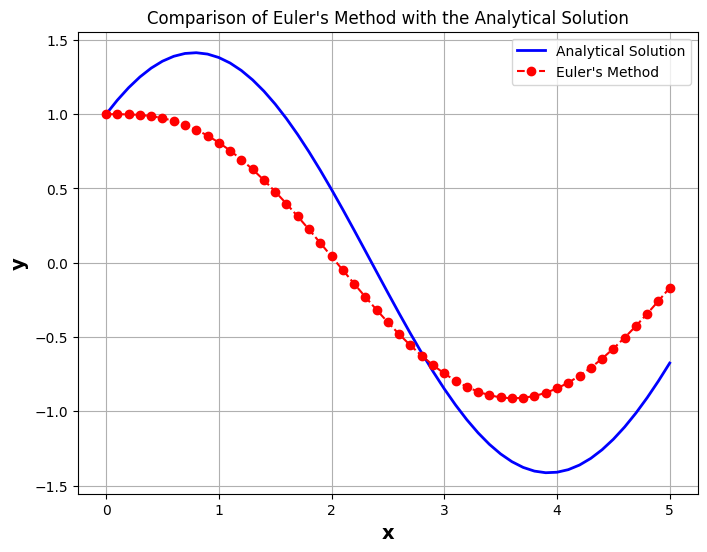

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')  # Ensures a white background




################### Define the ODE function dy/dx = f(x, y) ######################################
def f(x, y):
    return -2*y + 2*np.cos(x)

# Analytical solution y(x) = cos(x) + sin(x)
def analytical_solution(x):
    return np.cos(x) + np.sin(x)

####################################################################################################
############################ Euler's Method Implementation #########################################

# Euler's Method Implementation
def euler_method(f, x0, y0, h, x_end):
    x_values = np.arange(x0, x_end + h, h)  # Generate x values
    y_values = np.zeros(len(x_values))  # Array to store y values
    y_values[0] = y0  # Initial condition

    for i in range(1, len(x_values)):
        y_values[i] = y_values[i-1] + h * f(x_values[i-1], y_values[i-1])

    return x_values, y_values

####################################################################################################
####################################################################################################

# Parameters
x0, y0 = 0, 1  # Initial condition y(0) = 1
h = 0.1  # Step size
x_end = 5  # Solve until x = 5

# Solve ODE using Euler's Method
x_values, y_euler = euler_method(f, x0, y0, h, x_end)

# Compute the analytical solution
y_exact = analytical_solution(x_values)

# Plot the solutions
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_exact, label="Analytical Solution", linestyle='-', linewidth=2, color='blue')
plt.plot(x_values, y_euler, label="Euler's Method", marker='o', linestyle='--', color='red')
plt.xlabel('x', fontsize=14, fontweight='bold')
plt.ylabel('y', fontsize=14, fontweight='bold')
plt.title("Comparison of Euler's Method with the Analytical Solution")
plt.legend()
plt.grid(True)
plt.show()

## **Example non-converged solution**
Solve the ODE:

$$
\frac{dy}{dx} = x + y, \quad y(0) = 1
$$

using Euler's method with step size $ h = 0.1 $ up to $ x = 0.5 $.



#### **Table of Iterations**
| n  | $ x_n $  | $ y_n $ (Euler)|  $ y(x_n) $ (Analytical) | Error | 
|----|------|------------|----------------|----------------|
| 0  | 0.0  | 1.0000     | 1.0000         | 0.0000        |
| 1  | 0.1  | 1.1000     | 1.2110         | 0.0090        |
| 2  | 0.2  | 1.2200     | 1.4463         | 0.0843        |
| 3  | 0.3  | 1.3620     | 1.7089         | 0.1807        |
| 4  | 0.4  | 1.5282     | 2.0013         | 0.2803        |
| 5  | 0.5  | 1.7210     | 2.3266         | 0.3835        |


## **Solution of f(x) = (1 + x)exp(x)**

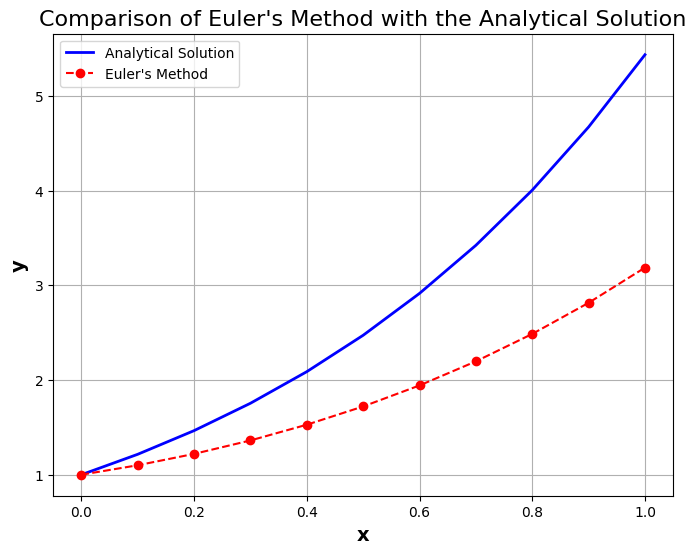

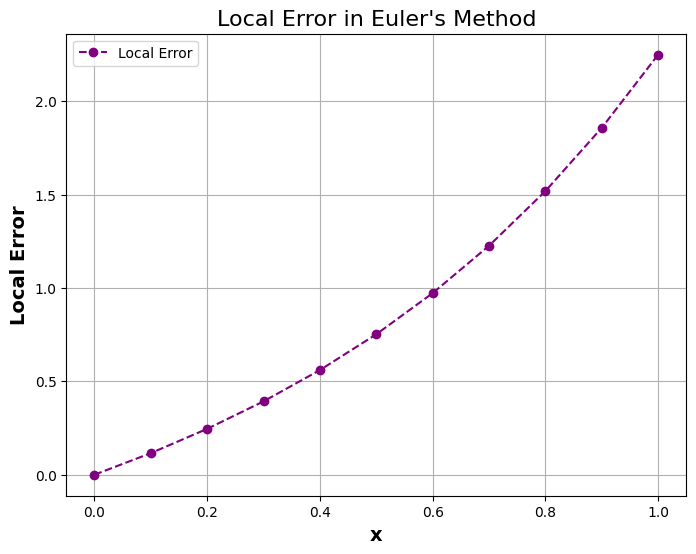

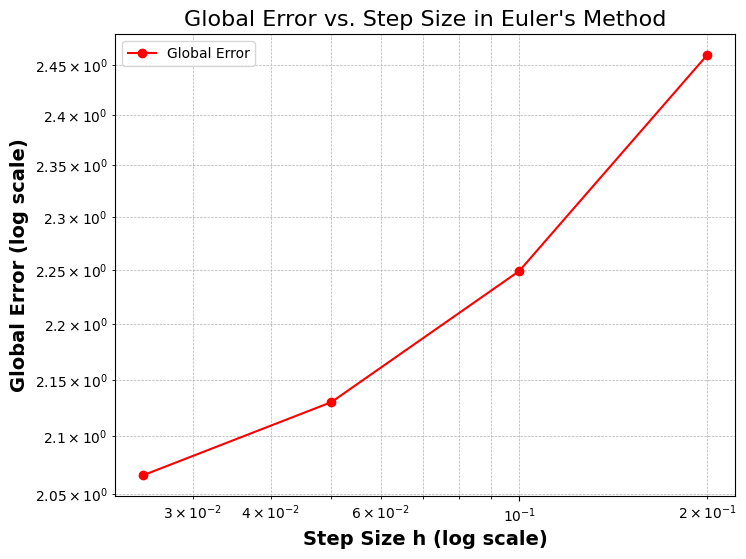

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')  # Ensures a white background

# Define the ODE function dy/dx = f(x, y)
def f(x, y):
    return x + y

# Analytical solution y(x) = (1 + x) * e^x
def analytical_solution(x):
    return (1 + x) * np.exp(x)

####################################################################################################
############################ Euler's Method Implementation #########################################

# Euler's Method Implementation
def euler_method(f, x0, y0, h, x_end):
    x_values = np.arange(x0, x_end + h, h)  # Generate x values
    y_values = np.zeros(len(x_values))  # Array to store y values
    y_values[0] = y0  # Initial condition

    for i in range(1, len(x_values)):
        y_values[i] = y_values[i-1] + h * f(x_values[i-1], y_values[i-1])

    return x_values, y_values

####################################################################################################
####################################################################################################

# Parameters
x0, y0 = 0, 1  # Initial condition y(0) = 1
h = 0.1  # Step size
x_end = 1  # Solve until x = 1

# Solve ODE using Euler's Method
x_values, y_euler = euler_method(f, x0, y0, h, x_end)

# Compute the analytical solution
y_exact = analytical_solution(x_values)

# Compute Local Errors (Stepwise Error)
local_errors = np.abs(y_exact - y_euler)

# Compute Global Error (Maximum Error)
global_errors = []
step_sizes = [0.2, 0.1, 0.05, 0.025]
for h in step_sizes:
    x_vals, y_eul = euler_method(f, x0, y0, h, x_end)
    y_ex = analytical_solution(x_vals)
    global_errors.append(np.max(np.abs(y_ex - y_eul)))

####################################################################################################
################################## Plot Results ####################################################

# Plot numerical vs analytical solution
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_exact, label="Analytical Solution", linestyle='-', linewidth=2, color='blue')
plt.plot(x_values, y_euler, label="Euler's Method", marker='o', linestyle='--', color='red')
plt.xlabel('x', fontsize=14, fontweight='bold')
plt.ylabel('y', fontsize=14, fontweight='bold')
plt.title("Comparison of Euler's Method with the Analytical Solution", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

# Plot Local Error
plt.figure(figsize=(8, 6))
plt.plot(x_values, local_errors, marker='o', linestyle='--', color='purple', label="Local Error")
plt.xlabel('x', fontsize=14, fontweight='bold')
plt.ylabel('Local Error', fontsize=14, fontweight='bold')
plt.title("Local Error in Euler's Method", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

# Plot Global Error vs Step Size (Log-Log Plot)
plt.figure(figsize=(8, 6))
plt.loglog(step_sizes, global_errors, marker='o', linestyle='-', color='red', label="Global Error")
plt.xlabel('Step Size h (log scale)', fontsize=14, fontweight='bold')
plt.ylabel('Global Error (log scale)', fontsize=14, fontweight='bold')
plt.title("Global Error vs. Step Size in Euler's Method", fontsize=16)
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

### **Decreasing h does not help coonvenrgence**

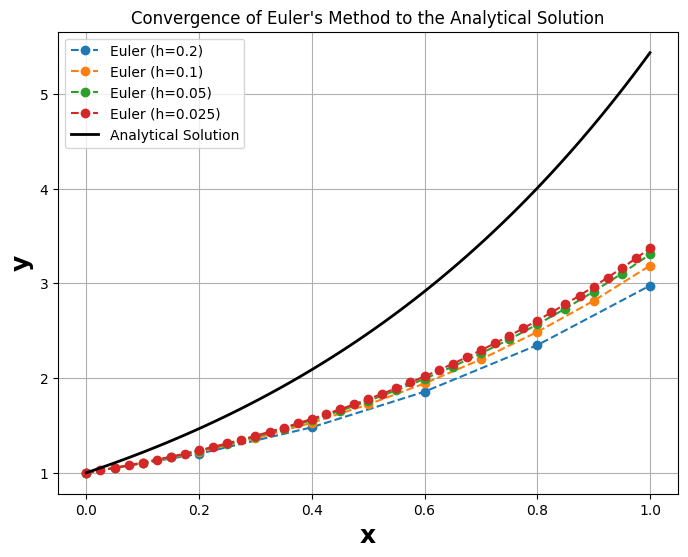

In [13]:

# Parameters
x0, y0 = 0, 1  # Initial condition y(0) = 1
x_end = 1  # Solve until x = 1

# Different step sizes to analyze convergence
step_sizes = [0.2, 0.1, 0.05, 0.025]

plt.figure(figsize=(8, 6))

# Plot numerical solutions with different step sizes
for h in step_sizes:
    x_values, y_euler = euler_method(f, x0, y0, h, x_end)
    y_exact = analytical_solution(x_values)
    plt.plot(x_values, y_euler, marker='o', linestyle='--', label=f"Euler (h={h})")

# Plot analytical solution
x_fine = np.linspace(x0, x_end, 100)
y_fine = analytical_solution(x_fine)
plt.plot(x_fine, y_fine, label="Analytical Solution", linestyle='-', linewidth=2, color='black')

# Labels and legend
plt.xlabel('x', fontsize=18, fontweight='bold')
plt.ylabel('y', fontsize=18, fontweight='bold')
plt.title("Convergence of Euler's Method to the Analytical Solution")
plt.legend()
plt.grid(True)
plt.show()

# Compute error as a function of step size h
errors = []

for h in step_sizes:
    x_values, y_euler = euler_method(f, x0, y0, h, x_end)
    y_exact = analytical_solution(x_values)
    max_error = np.max(np.abs(y_euler - y_exact))  # Maximum absolute error for this step size
    errors.append(max_error)

# Convert step sizes and errors to numpy arrays for plotting
h_values = np.array(step_sizes)
errors = np.array(errors)
plt.show()



### **Error vs step-size**

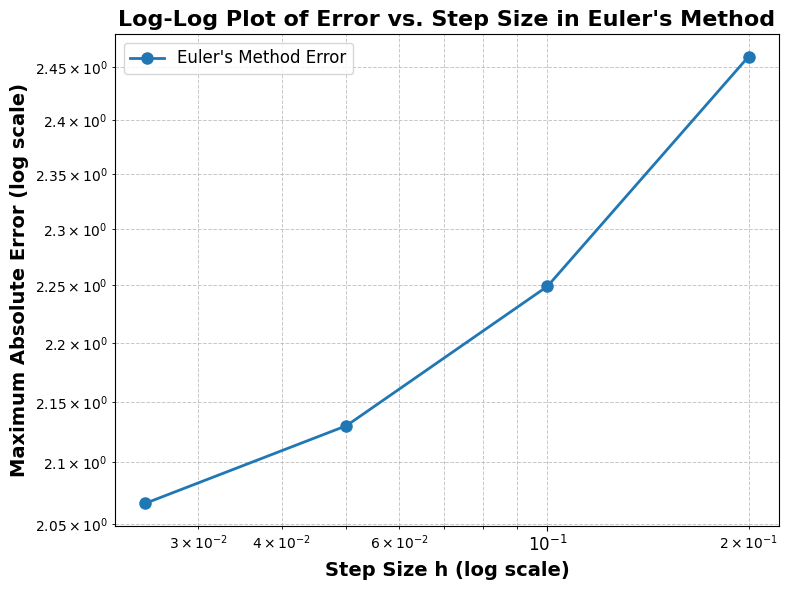

In [14]:


# Create log-log plot
plt.figure(figsize=(8, 6))  # Set figure size
plt.loglog(h_values, errors, marker='o', linestyle='-', linewidth=2, markersize=8, label="Euler's Method Error")

# Labels and title with larger font sizes
plt.xlabel('Step Size h (log scale)', fontsize=14, fontweight='bold')
plt.ylabel('Maximum Absolute Error (log scale)', fontsize=14, fontweight='bold')
plt.title("Log-Log Plot of Error vs. Step Size in Euler's Method", fontsize=16, fontweight='bold')

# Enlarged tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Improved legend
plt.legend(fontsize=12, loc='upper left', frameon=True)

# Improved grid styling
plt.grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()